https://app.datacamp.com/workspace/w/027a10e4-6a0a-4312-9b34-2c1f7c9f24ab#turnover-summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('employee_churn_data.csv')
df.head(9540)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [2]:
data = df.copy()

***Exploratory Data Analysis (EDA)***

In [3]:
#Check missing data
df.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [4]:
# Department with sorted number of employee turnovers: from highest to lowest
no_turnover = df[df.left == 'yes'].groupby('department').left.count().sort_values()

no_turnover.to_frame()

,left
department,
finance,108
IT,110
logistics,111
admin,119
support,212
marketing,243
operations,436
engineering,437
retail,471


In [17]:
turnover_rate = df.left.value_counts()/len(df)
turnover_rate

no     0.708176
yes    0.291824
Name: left, dtype: float64

Looks like about 71% of the employees stayed and about 29% of the employees left.

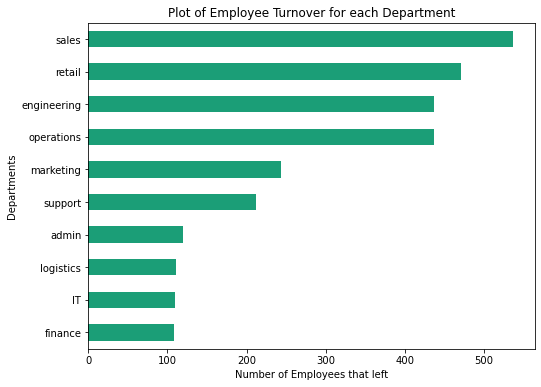

In [5]:
# Department with sorted number of employee turnovers: from highest to lowest

fig, ax = plt.subplots(figsize=(8, 6))
no_turnover.plot.barh(ax=ax, title="Plot of Employee Turnover for each Department", colormap='Dark2')
plt.xlabel("Number of Employees that left")
plt.ylabel("Departments")
plt.show()

**1. Which department has the highest employee turnover? Which one has the lowest?**

The Department with the highest number of employee turnover as seen above is the Sales department, while the departments with the least is the Finance and IT department.

In [ ]:
#Statistical Overview of the employee turnover dataset
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [20]:
#Turnover Summary
turnover_summary = df.groupby('left')
turnover_summary.mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
no,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
yes,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


Based on turnover summary, it can be seen that the employees who got promoted did not leave, whereas the employees that did not get promoted left.

In [55]:
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left', 'promoted_category'],
      dtype='object')

In [59]:
df[['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left', 'promoted_category']].corr()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190,-0.036777
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096,0.304294
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299,-0.012408
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618,0.010521
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142,-0.009721
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370,-0.011485
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000,0.009008
left,-0.036777,0.304294,-0.012408,0.010521,-0.009721,-0.011485,0.009008,1.000000


In [61]:
dcorr=df[['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left', 'promoted_category']].corr()
dcorr

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190,-0.036777
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096,0.304294
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299,-0.012408
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618,0.010521
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142,-0.009721
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370,-0.011485
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000,0.009008
left,-0.036777,0.304294,-0.012408,0.010521,-0.009721,-0.011485,0.009008,1.000000


In [ ]:
dcorr.style.background_gradient()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190,-0.036777
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096,0.304294
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299,-0.012408
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618,0.010521
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142,-0.009721
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370,-0.011485
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000,0.009008
left,-0.036777,0.304294,-0.012408,0.010521,-0.009721,-0.011485,0.009008,1.000000


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190,-0.036777
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096,0.304294
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299,-0.012408
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618,0.010521
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142,-0.009721
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370,-0.011485
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000,0.009008
left,-0.036777,0.304294,-0.012408,0.010521,-0.009721,-0.011485,0.009008,1.000000


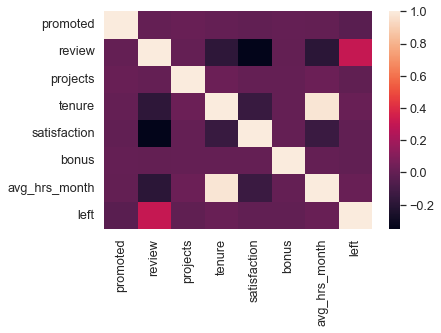

In [63]:
#Correlation Matrix and Heatmap
import seaborn as sns
corr = df.corr()
corr = (corr)
sns.heatmap(corr, xticklabels = corr.columns.values,
                  yticklabels = corr.columns.values)
corr

**Findings from the correlation Matrix and Heatmap**

Positively Correlated Features:

review vs left: 0.304294
tenure vs avg_hrs_month: 0.978618
Negatively Correlated Features:
review vs satisfaction: -0.349778

Summary

From the heatmap, there is a positive(+) correlation between review, left, tenure and avg_hrs_month. This can be interpreted as:

The employees decided to leave or stay based on the review they recieved.
The avg_hrs_month is definitely high for the employees working for more number of years.
For the negative(-) correlation the review and satisfaction are highly correlated. This can be interpreted as:

The employees were not satisfied with the reviews they received.

In [23]:
df['left'].replace('no', 0, inplace=True)
df['left'].replace('yes', 1, inplace=True)

In [24]:
#compare the means of employee left review against the employee population review
emp_population = df['review'][df['left'] == 0].mean()
emp_turnover_review = df[df['left']==1]['review'].mean()

print( 'The mean review for the employee population who did not leave is: ' + str(emp_population))
print( 'The mean review for employees that had left is: ' + str(emp_turnover_review) )

The mean review for the employee population who did not leave is: 0.635163672768492
The mean review for employees that had left is: 0.6922619851915817


In [27]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['left']==1]['review'], # Sample of Employee review who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover review mean

Ttest_1sampResult(statistic=31.59278288897046, pvalue=1.7875413653279587e-187)

T-Test Result

The test result shows the test statistic "t" is equal to 31.59. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

T-Test Quantile

If the t-statistic value we calculated above (31.59) is outside the quantiles, then we can reject the null hypothesis

In [29]:
degree_freedom = len(df[df['left']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.960816457740003
The t-distribution right quartile range is: 1.9608164577400025


One-Sample T-Test Summary

T-Test = 31.59 | P-Value = 1.78 | Accept Null Hypothesis

Accept the null hypothesis because:

-T-Test score is outside the quantiles -P-value is greater than confidence level of 5% Based on the statistical analysis of a one sample t-test, there seems to no significant difference between the mean review of employees who had a turnover and the entire employee population. The super high P-value of 1.78_ at a 5% confidence level is a good indicator to accept the null hypothesis.

Distribution Plots (Satisfaction - Review - Average Monthly Hours)

Text(0, 0.5, 'Employee Count')

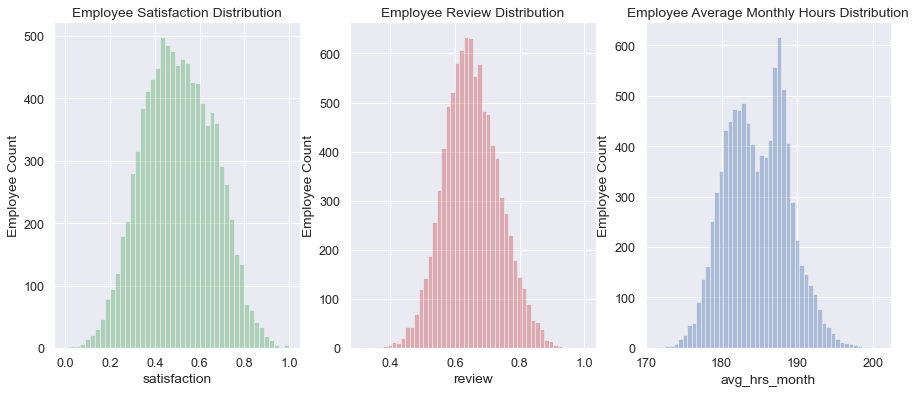

In [31]:
import matplotlib.pyplot as plt
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Review
sns.distplot(df.review, kde=False, color="r", ax=axes[1]).set_title('Employee Review Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.avg_hrs_month, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

Summary: Let's examine the distribution on some of the employee's features. Here's what I found:

Satisfaction - There is a huge spike for employees with mean satisfaction (between 0.4 to 0.6).
Review - There is a huge spike for employees for mean review (between 0.6 to 0.8)
AverageMonthlyHours - There is bimodal distribution of employees with lower and higher average monthly hours (less than 180 hours & more than 185 hours)
The review and satisfaction graphs both share a similar distribution.
Employees with high review were highly satisfied and vice versa.
If you look back at the correlation matrix, the negative high correlation between review and satisfaction does support this finding.

******Salary VS Left******

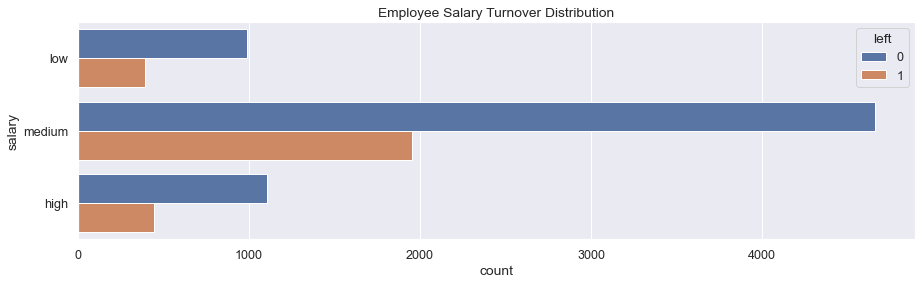

In [36]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Employee Salary Turnover Distribution');

Summary: This is not unusual. Here's what I found:

    Majority of employees who left had medium salary.

    Barely any employees left with high salary

    Employees with low to average salaries tend to leave the company.

Think:

    What is the work environment like for low, medium, and high salaries?

    What made employees with high salaries to leave?

**Department VS left**

In [38]:
df['department'].unique()

array(['operations', 'support', 'logistics', 'sales', 'IT', 'admin',
       'engineering', 'marketing', 'finance', 'retail'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'operations'),
  Text(1, 0, 'support'),
  Text(2, 0, 'logistics'),
  Text(3, 0, 'sales'),
  Text(4, 0, 'IT'),
  Text(5, 0, 'admin'),
  Text(6, 0, 'engineering'),
  Text(7, 0, 'marketing'),
  Text(8, 0, 'finance'),
  Text(9, 0, 'retail')])

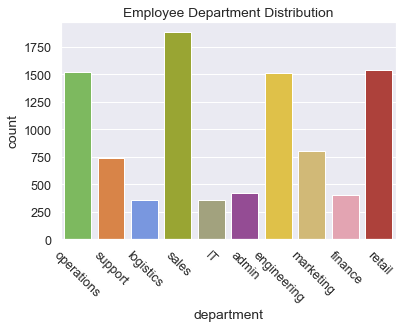

In [39]:
# Employee distribution
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

Operation, Sales, Engineering and Retail departments had the most number of employees. The Sales department was the highest and the logistics and IT department were the lowest.

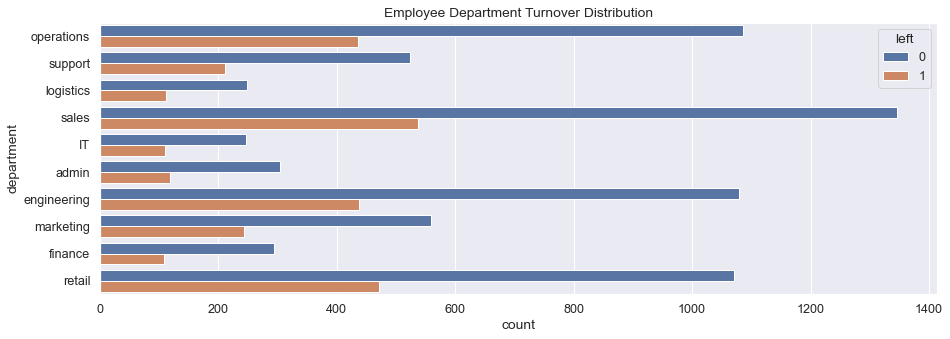

In [40]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='left', data=df).set_title('Employee Department Turnover Distribution');

Summary: Let's see more information about the departments. Here's what I found:

The sales, retail, and engineering department were the top 3 departments to have employee turnover The IT department had the smallest amount of turnover

Think:

If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

**Project VS Left**

[Text(0, 0.5, 'Percent')]

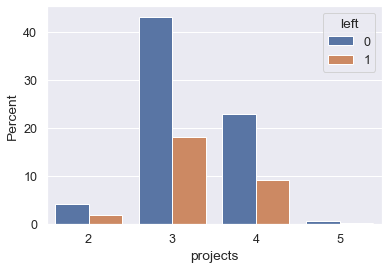

In [42]:
ax = sns.barplot(x="projects", y="projects", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Summary: This graph is quite interesting as well. Here's what I found:

More than half of the employees with 3 and 4 projects left the company

Majority of the employees who did not leave the company had 2 and 5 projects

There is an decrease in employee turnover rate as project count increases

Think:

Why are employees leaving at the lower/higher spectrum of project counts?

Does this means that employees with project counts 2 or less are not having to work hard causing less tension, thus not leaving the company?

Do employees with 3+ projects are getting overworked, thus leaving the company?

**Left VS Review**

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

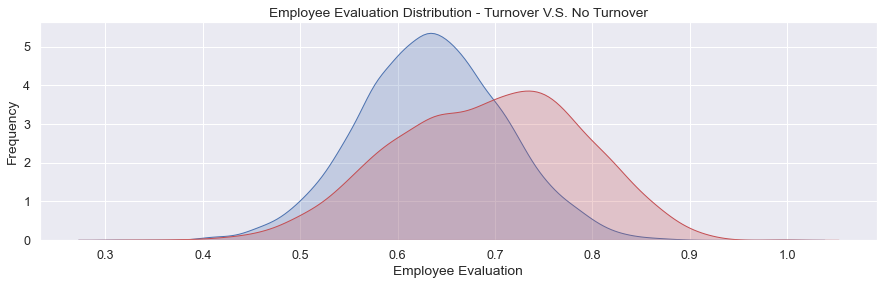

In [43]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['left'] == 0),'review'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'review'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Summary:

Employees with high performance or review tend to leave the company more.

Employees that stayed is within 0.5 to 0.7 review.

There is a normal distribution for no turnover.

**Left VS AverageMonthlyHours**

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

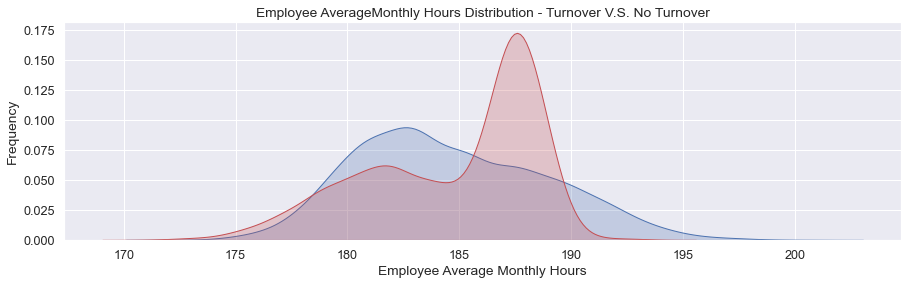

In [45]:
#Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'avg_hrs_month'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'avg_hrs_month'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

Summary:

Employees who left generally were underworked or overworked.

**Left VS Satisfaction**

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

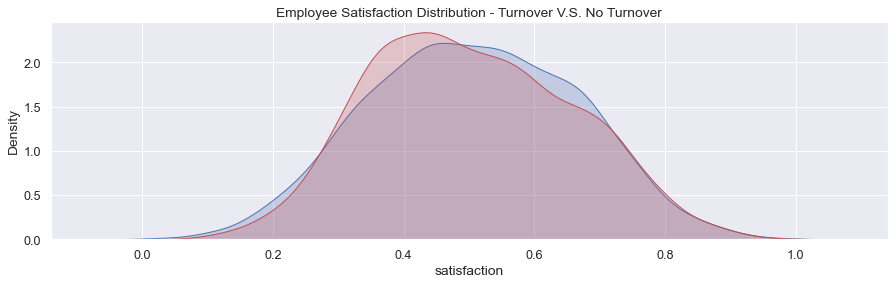

In [47]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

Summary:

Employees turnover does not depand on whether they were satisfied or not.

Questions:

Shouldn't employees with lower evaluations tend to leave the company more?

**Left V.S. Tenure**

[Text(0, 0.5, 'Percent')]

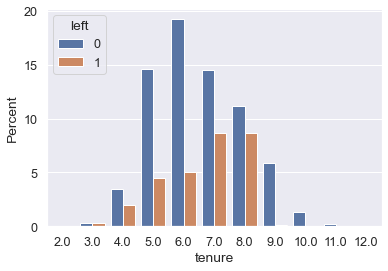

In [51]:
ax = sns.barplot(x="tenure", y="tenure", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Summary:

Employees who have worked for more number of years had left more.

Employees between 5 to 8 years of work stayed.

Employees between 7 to 9 years of work left more.

**Left vs Promoted**

[Text(0, 0.5, 'Percent')]

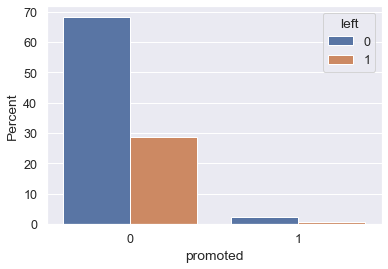

In [49]:
ax = sns.barplot(x="promoted", y="promoted", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Summary:

The turnover was high for those who did not get promoted.

**Conclusion**
Based on several findings and exploration of the dataset, we can conclude the following:

Employees with high review were highly satisfied and vice versa.

Majority of employees who left had medium salary.

The sales, retail, and engineering department were the top 3 departments to have employee turnover. The IT department had the smallest amount of turnover.

Review variable turned out to be the better predictor for employee turnover.

Employees with 3 and 4 projects left the company.

Employees with high performance or review tend to leave the company more.

Employees who left generally were underworked or overworked.

Employees left despite having high review for 5 projects. This can be due to the workload of handling many projects at the same time.

Employees between 7 to 9 years of work left more.

Employees who did not get promoted left more.

**Recommendations:**
Even though the employees with high review were highly satisfied but with 5 projects or more left the company. This is can be due to overworking. The solution to this can be providing better work life balance. Providing a supportive team to carry out the project. Motivate the employees more by giving high incentives or bonus.
Since the departments - sales, retail and engineering had the highest turnover rate, a more thorough investigation must be done as to why this was happening.
Some employees left despite the high review. This could have been because the employees did not recieve the good amount of salary or incentives despite their excellent performances. Therefore, increasing the salary or giving extra benefits or motivation to high performing employees can result in decreased turnover.
Employees who were highly experienced i.e., 7 to 9 years of work, left more. With high experience the employees could have got better options of work in some other places. Therefore, doing an in depth study of why highly experienced employees left could result in decreased turnover.